In [7]:
epsilon = 1/3.100
kappa = 1.590
delta = 0.333
radius = 9.072
blanket = 1.2
sigma = 0.1
ctf = 1.050
coh = 0.818

return

In [8]:
using Plots
using Interact
using LaTeXStrings
pgfplots()

Plots.PGFPlotsBackend()

In [9]:
function itr(cur_value::AbstractFloat, cur_count=11)
    dif_value = cur_value * 0.7
    min_value = cur_value - dif_value
    max_value = cur_value + dif_value
    linspace(min_value, max_value, cur_count)
end

itr (generic function with 2 methods)

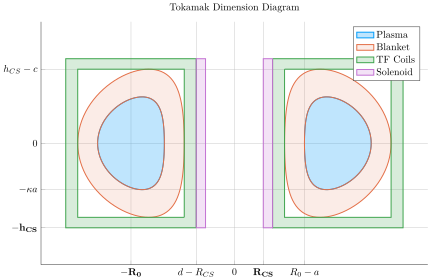

In [123]:
tmp_val_1 = 0.3 * ( 1 - delta ^ 2 )
tmp_val_2 = ( -1 + 2 * delta + tmp_val_1 ) / 8

cc = [
    -delta/2, 1 - tmp_val_2,
    +delta/2, 0 + tmp_val_2
]

npts = 101
aa = linspace(0, 2*pi, npts)

xx = zeros(aa)

for (cur_i, cur_c) in enumerate(cc)
    xx += cur_c * cos.( (cur_i-1) * aa )
end

yy = kappa * sin.(aa)

rr = radius * ( 1 + epsilon * xx )
zz = radius * ( 0 + epsilon * yy )

tokamak_dimensions_plot = plot()

bb = 1.2

cc = 0.8

xir = radius * ( 1 + ( epsilon + bb / radius ) * xx[1] * ( radius + bb ) / radius )
xil = radius * ( 1 + ( epsilon + bb / radius ) * xx[Int(((npts-1))/2)+1] * ( radius + bb ) / radius )

yit = radius * ( 0 + ( epsilon + bb / radius ) * yy[Int(((npts-1))/4)+1] * ( radius + bb ) / radius )
yib = radius * ( 0 + ( epsilon + bb / radius ) * yy[3*Int(((npts-1))/4)+1] * ( radius + bb ) / radius )

xol = xil - ctf
xor = xir + ctf

yot = yit + ctf
yob = yib - ctf

rr2 = radius * ( 1 + ( epsilon + bb / radius ) * xx * ( radius + bb ) / radius )
zz2 = radius * ( 0 + ( epsilon + bb / radius ) * yy * ( radius + bb ) / radius )

plot!(
    [-rr..., NaN, +rr...], 
    [+zz..., NaN, +zz...],
    label="Plasma", fill=true, fillopacity=0.25,
    xticks=(
        [0; (xol-coh); -radius; radius*(1-epsilon); -xol], 
        [0, L"\bf{R_{CS}}", L"\bf{{-R}_0}", L"R_0 - a", L"d - R_{CS}"]
    ),
    yticks=(
        [0;yob; -zz[Int(((npts-1))/4)+1]; yit],
        [0;L"\bf{{-h}_{CS}}";L"{-\kappa} a"; L"h_{CS} - c"]
    )
)

plot!(
    [-rr2..., NaN, +rr2...,NaN,+rr..., NaN, -rr...], 
    [+zz2..., NaN, +zz2...,NaN,+reverse(zz)..., NaN, +reverse(zz)...],
    label="Blanket", fill=true, fillopacity=0.125
)

max_radius = maximum(itr(radius)) * 1.1
max_height = maximum(itr(radius)) * 2.5

xlims!(-max_radius, +max_radius)
ylims!(-max_radius*epsilon*kappa*1.4, +max_radius*epsilon*kappa*1.4)

# xlabel!("Width")
# ylabel!("Height")

title!("Tokamak Dimension Diagram")

tf_x = [xil, xir, xir, xil, xil, NaN]
append!(tf_x, reverse([xol, xor, xor, xol, xol]))

tf_y = [yit, yit, yib, yib, yit, NaN]
append!(tf_y, reverse([yot, yot, yob, yob, yot]))

plot!([-tf_x...,NaN,tf_x...], [-tf_y...,NaN,tf_y...], fill=true, fillopacity=0.2, label="TF Coils")

oh_x = [xol, xol, xol-coh, xol-coh, xol]
oh_y = [yot, yob, yob, yot, yot]

plot!([-oh_x...,NaN,oh_x...], [-oh_y...,NaN,oh_y...], fill=true, fillopacity=0.2, label="Solenoid")

In [124]:
savefig(tokamak_dimensions_plot,"tokamak_dimensions.tex")